In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import pathlib
from torchvision.datasets import CIFAR10, MNIST
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from PIL import Image


from typing import List, Sequence, Optional, Callable, Any, Dict
from torchtyping import TensorType as TT  # type: ignore
from torchtyping import patch_typeguard   # type: ignore
from typeguard import typechecked, check_argument_types  # type: ignore
%matplotlib inline

In [2]:
transform=transforms.Compose([
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomVerticalFlip(),
                      transforms.RandomRotation(15),
                      transforms.RandomRotation(180),
                      transforms.Resize([32, 32]),
                      transforms.RandomCrop([28, 28]),
                      transforms.ToTensor()
                  ])

In [3]:
class unlabelCIFAR10(CIFAR10):
    def __init__(self,
                 root : str,
                 train : bool = True,
                 download: bool = False,
                 transform: Optional[Callable] = None,
                ):
        super().__init__(root, transform = transform)
        
    def __getitem__(self, index):
        img = self.data[index]
        img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)
            
        return img
    
    def __len__(self):
        self.data.shape[0]

In [4]:
data = unlabelCIFAR10(root = 'datasets/', download = True, transform = transform)

dataset = CIFAR10(root='datasets/', download=True, transform = transform)
test_dataset = CIFAR10(root='datasets/', train=False, transform = transforms.ToTensor())

mnist_dataset = MNIST(root='datasets/', download = True, transform = transforms.ToTensor())

Files already downloaded and verified


In [5]:
torch.manual_seed(43)
val_size = 5000
batch_size = 128
train_size = len(dataset) - val_size

In [6]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])

In [7]:
label_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)


mnist_loader = DataLoader(mnist_dataset, batch_size, num_workers = 4,  pin_memory=True)

unlabel_loader = DataLoader(data, batch_size, num_workers = 4,  pin_memory=True)

images.shape: torch.Size([128, 3, 28, 28])


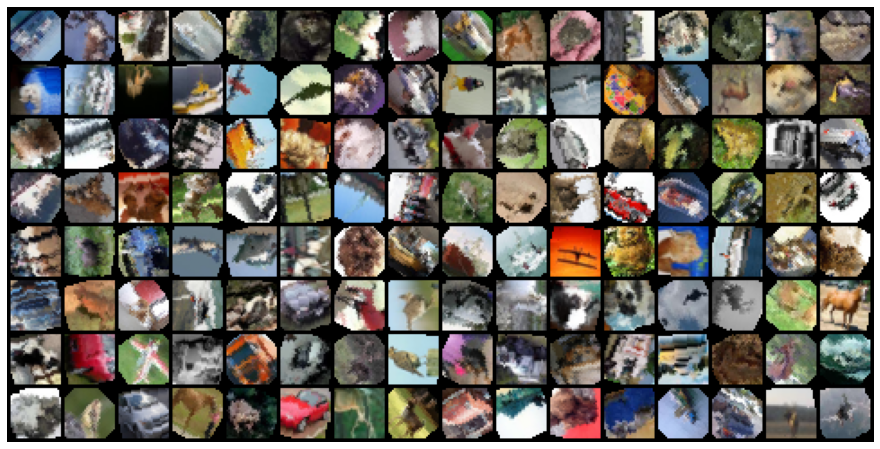

In [12]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break